In [135]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline

In [88]:
import emoji

In [89]:
import pandas as  pd
train = pd.read_csv('data/emojify/train_emoji.csv',names=["0","1","2","3"])
test = pd.read_csv('data/emojify/test_emoji.csv',names=["0","1","2","3"])

In [90]:
emoji_dictionary={0:"\u2764\uFE0F",1:":baseball:",2:":smile:",3:":disappointed:",4:":fork_and_knife:"}
def convert_to_emoji(label):
    return emoji.emojize(emoji_dictionary[label],use_aliases=True)

In [91]:
def convert_to_one_hot(y,c):
    y=np.eye(c)[y.reshape(-1)]
    return y

In [92]:
def read_glove_vecs(glove_file):
    with open(glove_file,'r',encoding="utf8") as f:
        word_to_vec={}
        word_to_index={}
        index_to_word={}
        word=set()
        for line in f:
            line=line.strip().split()
            curr_word=line[0]
            word.add(curr_word)
            word_to_vec[curr_word]=np.array(line[1:],dtype=np.float64)
        i=1
        for w in sorted(word):
            word_to_index[w]=i
            index_to_word[i]=w
            i=i+1
    return  word_to_index,index_to_word,word_to_vec      

In [93]:
def sentence_to_avg(sentence, word_to_vec_map):
    # Step 1: Split sentence into list of lower case words (≈ 1 line)
    words = sentence.lower().split()

    # Initialize the average word vector, should have the same shape as your word vectors.
    avg = np.zeros_like(word_to_vec_map[words[0]])
    
    # Step 2: average the word vectors. You can loop over the words in the list "words".
    total = 0
    for w in words:
        total += word_to_vec_map[w]
    avg = total/len(words)
    
    return avg

In [107]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

In [121]:
def predict(X,y,W,b,word_to_vec_map):
    m=X.shape[0]
    prediction=np.zeros((m,1))
    for i in range(m):
        avg=sentence_to_avg(X[i],word_to_vec_map)
        Z = np.dot(W, avg) + b
        A = softmax(Z)
        prediction[i] = np.argmax(A) 
    print("Accuracy: "  + str(np.mean((prediction[:] == y.reshape(y.shape[0],1)[:]))))    
    return prediction
    

In [126]:
def plot_confusion_matrix(y_actu, y_pred, title='Confusion matrix'):
    
    df_confusion = pd.crosstab(y_actu, y_pred.reshape(y_pred.shape[0],), rownames=['Actual'], colnames=['Predicted'], margins=True)
    
    df_conf_norm = df_confusion / df_confusion.sum(axis=1)
    
    plt.matshow(df_confusion) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

In [117]:
X_train=np.array(train.loc[:,"0"])
y_train=np.array(train.loc[:,"1"])
X_test=np.array(test.loc[:,"0"])
y_test=np.array(test.loc[:,"1"])

In [96]:
#find the maximum length of a string in X_train
max_len_train=len(max(X_train,key=len).split())
#find the maximum length of a string in X_test
max_len_test=len(max(X_test,key=len).split())

In [97]:
#display  sentences from X_train and corresponding labels from Y_train.
for idx in range(10):
    print(X_train[idx], convert_to_emoji(y_train[idx]))

never talk to me again 😞
I am proud of your achievements 😄
It is the worst day in my life 😞
Miss you so much ❤️
food is life 🍴
I love you mum ❤️
Stop saying bullshit 😞
congratulations on your acceptance 😄
The assignment is too long  😞
I want to go play ⚾


In [98]:
y_oh_train = convert_to_one_hot(y_train, c= 5)
y_oh_test = convert_to_one_hot(y_test, c = 5)

In [99]:
idx = 25
print(f"Sentence '{X_train[50]}' has label index {y_train[idx]}, which is emoji {convert_to_emoji(y_train[idx])}", )
print(f"Label index {y_train[idx]} in one-hot encoding format is {y_oh_train[idx]}")

Sentence 'I missed you' has label index 1, which is emoji ⚾
Label index 1 in one-hot encoding format is [0. 1. 0. 0. 0.]


In [100]:
word_to_index, index_to_word, word_to_vec_map = read_glove_vecs(r'C:\Users\RN7\data\emojify/glove.6B.50d.txt')

In [101]:
word = "fruit"
idx = 289846
print("the index of", word, "in the vocabulary is", word_to_index[word])
print("the", str(idx) + "th word in the vocabulary is", index_to_word[idx])

the index of fruit in the vocabulary is 154530
the 289846th word in the vocabulary is potatos


## Baseline Model

In [118]:
def model(X, Y, word_to_vec_map, learning_rate = 0.01, num_iterations = 400):
    
    np.random.seed(1)

    m = Y.shape[0]                          # number of training examples
    n_y = 5                                 # number of classes  
    n_h = 50                                # dimensions of the GloVe vectors 
    
    # Initialize parameters using Xavier initialization
    W = np.random.randn(n_y, n_h) / np.sqrt(n_h)
    b = np.zeros((n_y,))
    
    # Convert Y to Y_onehot with n_y classes
    Y_oh = convert_to_one_hot(Y, c= n_y) 
    
    # Optimization loop
    for t in range(num_iterations): # Loop over the number of iterations
        for i in range(m):          # Loop over the training examples
            
            # Average the word vectors of the words from the i'th training example
            avg = sentence_to_avg(X[i], word_to_vec_map)

            # Forward propagate the avg through the softmax layer
            z = np.dot(W,avg)+b
            a = softmax(z)

            # Compute cost using the i'th training label's one hot representation and "A" (the output of the softmax)
            cost = -np.sum(np.dot(Y_oh[i],np.log(a)))
            ### END CODE HERE ###
            
            # Compute gradients 
            dz = a - Y_oh[i]
            dW = np.dot(dz.reshape(n_y,1), avg.reshape(1, n_h))
            db = dz

            # Update parameters with Stochastic Gradient Descent
            W = W - learning_rate * dW
            b = b - learning_rate * db
        
        if t % 100 == 0:
            print("Epoch: " + str(t) + " --- cost = " + str(cost))
            pred = predict(X, Y, W, b, word_to_vec_map) #predict is defined in emo_utils.py

    return pred, W, b

In [122]:
pred, W, b = model(X_train, y_train, word_to_vec_map)
print(pred)

Epoch: 0 --- cost = 1.9520498812810072
Accuracy: 0.3484848484848485
Epoch: 100 --- cost = 0.07971818726014807
Accuracy: 0.9318181818181818
Epoch: 200 --- cost = 0.04456369243681402
Accuracy: 0.9545454545454546
Epoch: 300 --- cost = 0.03432267378786059
Accuracy: 0.9696969696969697
[[3.]
 [2.]
 [3.]
 [0.]
 [4.]
 [0.]
 [3.]
 [2.]
 [3.]
 [1.]
 [3.]
 [3.]
 [1.]
 [3.]
 [2.]
 [3.]
 [2.]
 [3.]
 [1.]
 [2.]
 [3.]
 [0.]
 [2.]
 [2.]
 [2.]
 [1.]
 [4.]
 [3.]
 [3.]
 [4.]
 [0.]
 [3.]
 [4.]
 [2.]
 [0.]
 [3.]
 [2.]
 [2.]
 [3.]
 [4.]
 [2.]
 [2.]
 [0.]
 [2.]
 [3.]
 [0.]
 [3.]
 [2.]
 [4.]
 [3.]
 [0.]
 [3.]
 [3.]
 [3.]
 [4.]
 [2.]
 [1.]
 [1.]
 [1.]
 [2.]
 [3.]
 [1.]
 [0.]
 [0.]
 [0.]
 [3.]
 [4.]
 [4.]
 [2.]
 [2.]
 [1.]
 [2.]
 [0.]
 [3.]
 [2.]
 [2.]
 [0.]
 [3.]
 [3.]
 [1.]
 [2.]
 [1.]
 [2.]
 [2.]
 [4.]
 [3.]
 [3.]
 [2.]
 [4.]
 [0.]
 [0.]
 [3.]
 [3.]
 [3.]
 [3.]
 [2.]
 [0.]
 [1.]
 [2.]
 [3.]
 [0.]
 [2.]
 [2.]
 [2.]
 [3.]
 [2.]
 [2.]
 [2.]
 [4.]
 [1.]
 [1.]
 [3.]
 [3.]
 [4.]
 [1.]
 [2.]
 [1.]
 [1.]
 [3.]
 [1.]

In [123]:
print("Training set:")
pred_train = predict(X_train, y_train, W, b, word_to_vec_map)
print('Test set:')
pred_test = predict(X_test, y_test, W, b, word_to_vec_map)

Training set:
Accuracy: 0.9772727272727273
Test set:
Accuracy: 0.8571428571428571


confusion matrix is given below:


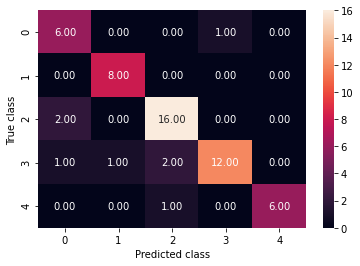

           ❤️    ⚾    😄    😞   🍴


In [141]:
#confusion matrix of Random forest Classifier
print("confusion matrix is given below:")
matrix=confusion_matrix(y_test,pred_test)
sns.heatmap(matrix, annot=True, fmt='.2f')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
print('           '+ convert_to_emoji(0)+ '    ' + convert_to_emoji(1) + '    ' +  convert_to_emoji(2)+ '    ' + convert_to_emoji(3)+'   ' + convert_to_emoji(4))

## Model using LSTM

In [142]:
np.random.seed(0)
from keras.models import Model
from keras.layers import Dense, Input, Dropout, LSTM, Activation
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.initializers import glorot_uniform
np.random.seed(1)

Using TensorFlow backend.


In [143]:
def sentences_to_indices(X, word_to_index, max_len):
    
    m = X.shape[0]                                   #
    X_indices = np.zeros((m,max_len))
    
    for i in range(m):                              
        
        sentence_words = [i.lower() for i in X[i].split()]
        
        j = 0
        
       
        for w in sentence_words:
            X_indices[i, j] = word_to_index[w]
            j = j+1
            
    
    return X_indices

In [144]:
def pretrained_embedding_layer(word_to_vec_map, word_to_index):
    
    vocab_len = len(word_to_index) + 1                 # extra 1 for unknown word 
    emb_dim = word_to_vec_map["cucumber"].shape[0]      # define dimensionality of your GloVe word vectors (= 50)
    emb_matrix = np.zeros((vocab_len,emb_dim))
    for word, idx in word_to_index.items():
        emb_matrix[idx, :] = word_to_vec_map[word]
    # Define Keras embedding layer with the correct input and output sizes
    # Make it non-trainable.
    embedding_layer = Embedding(vocab_len,emb_dim)

    # Build the embedding layer, it is required before setting the weights of the embedding layer. 
    embedding_layer.build((None,)) #  "None".is for non_trainable
    
    # Set the weights of the embedding layer to the embedding matrix. Your layer is now pretrained.
    embedding_layer.set_weights([emb_matrix])
    
    return embedding_layer

#### Build embedding layer

* Let's build the `Embedding()` layer in Keras, using pre-trained word vectors. 
* The embedding layer takes as input a list of word indices.
    * `sentences_to_indices()` creates these word indices.
* The embedding layer will return the word embeddings for a sentence. 

**Exercise**: Implement `pretrained_embedding_layer()` with these steps:
1. Initialize the embedding matrix as a numpy array of zeros.
    * The embedding matrix has a row for each unique word in the vocabulary.
        * There is one additional row to handle "unknown" words.
        * So vocab_len is the number of unique words plus one.
    * Each row will store the vector representation of one word. 
        * For example, one row may be 50 positions long if using GloVe word vectors.
    * In the code below, `emb_dim` represents the length of a word embedding.
2. Fill in each row of the embedding matrix with the vector representation of a word
    * Each word in `word_to_index` is a string.
    * word_to_vec_map is a dictionary where the keys are strings and the values are the word vectors.
3. Define the Keras embedding layer. 
    * Use [Embedding()](https://keras.io/layers/embeddings/). 
    * The input dimension is equal to the vocabulary length (number of unique words plus one).
    * The output dimension is equal to the number of positions in a word embedding.
    * Make this layer's embeddings fixed.
        * If you were to set `trainable = True`, then it will allow the optimization algorithm to modify the values of the word embeddings.
        * In this case, we don't want the model to modify the word embeddings.
4. Set the embedding weights to be equal to the embedding matrix.
    * Note that this is part of the code is already completed for you and does not need to be modified. 

In [171]:
def Emojify(input_shape, word_to_vec_map, word_to_index):
    
    sentence_indices = Input(input_shape, dtype='int32')
    
    embedding_layer = pretrained_embedding_layer(word_to_vec_map, word_to_index)
    
    embeddings = embedding_layer(sentence_indices)  
    
    X = LSTM(128, return_sequences = True)(embeddings)

    X = Dropout(0.5)(X)
   
    X = LSTM(128, return_sequences=False)(X)
 
    X = Dropout(0.5)(X)
 
    X = Dense(5)(X)
    
    X = Activation('softmax')(X)
    
    # Create Model instance which converts sentence_indices into X.
    model = Model(inputs=sentence_indices, outputs=X)
    
    ### END CODE HERE ###
    
    return model

In [177]:
model = Emojify((max_len_train,), word_to_vec_map, word_to_index)
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 10)                0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 10, 50)            20000050  
_________________________________________________________________
lstm_5 (LSTM)                (None, 10, 128)           91648     
_________________________________________________________________
dropout_5 (Dropout)          (None, 10, 128)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 645 

In [178]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [179]:
X_train_indices = sentences_to_indices(X_train, word_to_index, max_len_train)
Y_train_oh = convert_to_one_hot(y_train, c= 5)
model.fit(X_train_indices, Y_train_oh, epochs = 50, batch_size = 32, shuffle=True)

C:\Users\RN7\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/50
132/132 [==============================] - 3s 26ms/step - loss: 1.5914 - accuracy: 0.2803
Epoch 2/50
132/132 [==============================] - 3s 20ms/step - loss: 1.5306 - accuracy: 0.3030
Epoch 3/50
132/132 [==============================] - 3s 20ms/step - loss: 1.4706 - accuracy: 0.3712
Epoch 4/50
132/132 [==============================] - 3s 20ms/step - loss: 1.4318 - accuracy: 0.4470
Epoch 5/50
132/132 [==============================] - 3s 19ms/step - loss: 1.2990 - accuracy: 0.5758
Epoch 6/50
132/132 [==============================] - 3s 21ms/step - loss: 1.1853 - accuracy: 0.5833
Epoch 7/50
132/132 [==============================] - 3s 20ms/step - loss: 1.0255 - accuracy: 0.6439
Epoch 8/50
132/132 [==============================] - 3s 19ms/step - loss: 0.8645 - accuracy: 0.6818
Epoch 9/50
132/132 [==============================] - 3s 21ms/step - loss: 0.8270 - accuracy: 0.6970
Epoch 10/50
132/132 [==============================] - 3s 20ms/step - loss: 0.6487 - accura

In [180]:
X_test_indices = sentences_to_indices(X_test, word_to_index, max_len=max_len_train)
Y_test_oh = convert_to_one_hot(y_test, c= 5)
loss, acc = model.evaluate(X_test_indices, Y_test_oh)
print()
print("Test accuracy = ", acc)

56/56 [==============================] - 0s 4ms/step

Test accuracy =  0.8928571343421936


In [181]:
# This code allows you to see the mislabelled examples
C = 5
y_test_oh = np.eye(C)[y_test.reshape(-1)]
X_test_indices = sentences_to_indices(X_test, word_to_index, max_len_train)
pred = model.predict(X_test_indices)
for i in range(len(X_test)):
    x = X_test_indices
    num = np.argmax(pred[i])
    if(num != y_test[i]):
        print('Expected emoji:'+ convert_to_emoji(y_test[i]) + ' prediction: '+ X_test[i] + convert_to_emoji(num).strip())

Expected emoji:😞 prediction: work is hard	😄
Expected emoji:😞 prediction: This girl is messing with me	❤️
Expected emoji:🍴 prediction: any suggestions for dinner	😄
Expected emoji:😄 prediction: you brighten my day	😞
Expected emoji:😞 prediction: she is a bully	❤️
Expected emoji:🍴 prediction: I did not have breakfast 😞


In [194]:
# Change the sentence below to see your prediction. Make sure all the words are in the Glove embeddings.  
x_test = np.array(["Congratulations We hope you are  happy  for accomplishment !"])
X_test_indices = sentences_to_indices(x_test, word_to_index, max_len_train)
print(x_test[0] +' '+  convert_to_emoji(np.argmax(model.predict(X_test_indices))))

Congratulations We hope you are  happy  for accomplishment ! 😄
